## Imports

In [1]:
#pip install import-ipynb
#!pip install dill


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import random
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
# from matplotlib import animation
# from JSAnimation.IPython_display import display_animation
# import gym
import scipy.stats as stats
from scipy.stats import norm
from collections import namedtuple
import statistics
import time
import os
from collections import deque
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

import yfinance as yf
import datetime as dt

import pickle
import dill


##Importing environment classes

import import_ipynb
import Generate_Data
import Environment

/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'LogReturn',
       'RSI2', 'MA10', 'MA30', 'MA200', 'EMA10', 'EMA30', 'EMA200', 'ROC10',
       'ROC30', 'MOM10', 'MOM30', '%K10', '%D10', '%K30', '%D30', 'VIX',
       'RiskFreeRate', 'Volume', 'delta', 'gamma', 'theta', 'vega', 'rho'],
      dtype='object')
(3242, 30)
(434, 30)
(3242, 8)
(434, 8)
(3242, 10)
(434, 10)


<string>:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
<string>:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


## Loading Existing Models

Episode 0/1000, Total Reward: 59.624972342941945, P&L: 40.79858552665169, Std Dev P&L: nan
Episode 100/1000, Total Reward: -55.8551919638805, P&L: -125.12051969151094, Std Dev P&L: 152.782666317528
Episode 200/1000, Total Reward: 7.038041519431301, P&L: 33.69681504649693, Std Dev P&L: 208.512070416414
Episode 300/1000, Total Reward: 4.341360099330435, P&L: 72.53424016382942, Std Dev P&L: 146.99214428222126
Episode 400/1000, Total Reward: -0.0657936386102919, P&L: -0.13169648981380178, Std Dev P&L: 147.67215860340673
Episode 500/1000, Total Reward: 0.06408056645555271, P&L: 4.145447710536899, Std Dev P&L: 168.30534853029343
Episode 600/1000, Total Reward: 0.11133766494440354, P&L: 35.69271203872371, Std Dev P&L: 100.95914587669529
Episode 700/1000, Total Reward: 0.42868114484687425, P&L: 394.86332759524726, Std Dev P&L: 191.61676942788023
Episode 800/1000, Total Reward: 0.02657060090509511, P&L: 71.01290995791834, Std Dev P&L: 158.1968351002811
Episode 900/1000, Total Reward: 0.00450393

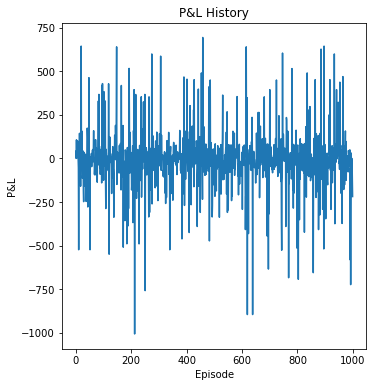

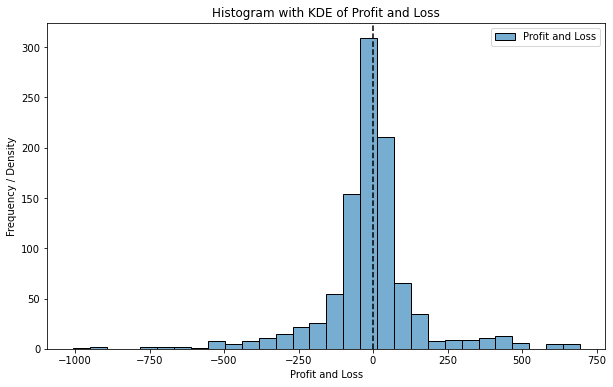

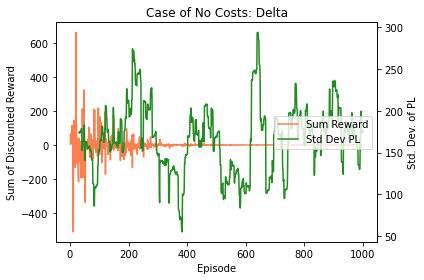

In [3]:
import Delta_Baseline

# Load the agent using dill
with open("models/trained_delta_agent.pkl", "rb") as f:
    delta_agent = dill.load(f)

Episode 0/1000, Total Reward: 212.55137548572833, P&L: 116.43592762421372, Std Dev P&L: nan


<string>:87: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)


Episode 100/1000, Total Reward: 41.550303097833435, P&L: 81.54662866872863, Std Dev P&L: 228.43596905869083
Episode 200/1000, Total Reward: -5.112972480237129, P&L: -48.442787204563956, Std Dev P&L: 86.56682232628327
Episode 300/1000, Total Reward: 17.80351788274222, P&L: 336.3720497633317, Std Dev P&L: 104.31922971686812
Episode 400/1000, Total Reward: -1.247961934189944, P&L: -56.12914441895959, Std Dev P&L: 124.42943148978365
Episode 500/1000, Total Reward: -1.2989752896313902, P&L: -168.8046918241257, Std Dev P&L: 133.72321570110407
Episode 600/1000, Total Reward: 0.5307404892595036, P&L: 180.90865098364253, Std Dev P&L: 115.7104339011342
Episode 700/1000, Total Reward: -0.04248204500101269, P&L: -40.581359122472435, Std Dev P&L: 179.856878994548
Episode 800/1000, Total Reward: 0.009580732564063095, P&L: 29.153707087184124, Std Dev P&L: 163.95835990905633
Episode 900/1000, Total Reward: 0.003323197134403543, P&L: 22.776174899252933, Std Dev P&L: 106.24356994768758


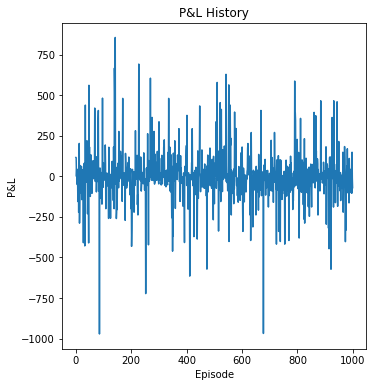

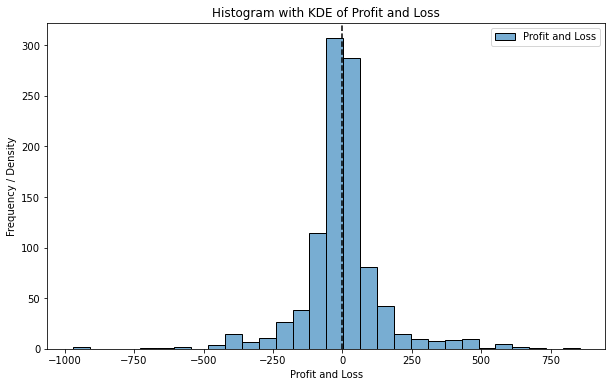

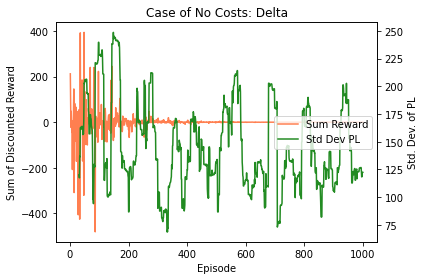

In [4]:
import DQN

# Load the agent using dill
with open("models/dqn_trained_agent.pkl", "rb") as f:
    dqn_agent = dill.load(f)


Episode 0/1000, Total Reward: -73.35533123607779, P&L: -13.025253854595128, Std Dev P&L: nan
Episode 100/1000, Total Reward: -11.591825159020864, P&L: 2.4531549628358587, Std Dev P&L: 133.74169248366078
Episode 200/1000, Total Reward: -1.3090700911838327, P&L: 46.3836227415022, Std Dev P&L: 116.99363271702832
Episode 300/1000, Total Reward: -11.20234799657263, P&L: -66.969242190837, Std Dev P&L: 132.56292124481638
Episode 400/1000, Total Reward: -32.2163864076122, P&L: -1020.9141962825126, Std Dev P&L: 244.15677542559447
Episode 500/1000, Total Reward: -0.8663004891385373, P&L: -55.120629490364436, Std Dev P&L: 152.9984701025678
Episode 600/1000, Total Reward: 0.0031392550374512856, P&L: 25.574572031245808, Std Dev P&L: 178.36071760484256
Episode 700/1000, Total Reward: -0.0470029293899585, P&L: 148.56085549105734, Std Dev P&L: 105.43025023111358
Episode 800/1000, Total Reward: -0.32854531241650037, P&L: -447.0289233346709, Std Dev P&L: 115.28257338679038
Episode 900/1000, Total Reward

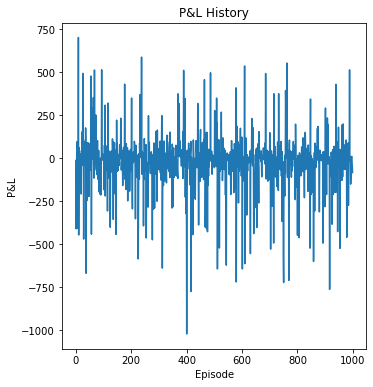

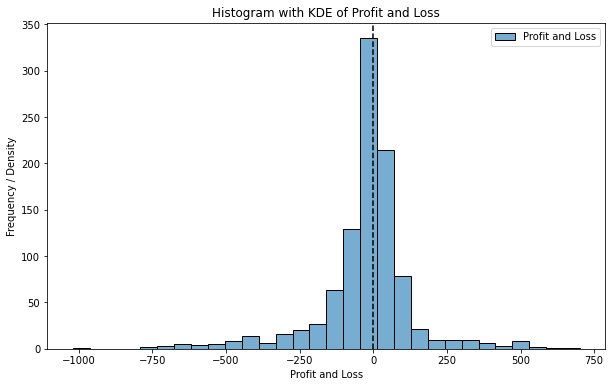

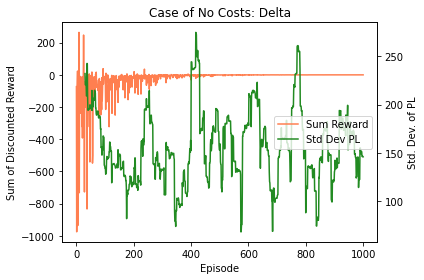

In [5]:
import DDPG

# Load the agent using dill
with open("models/ddpg_agent_full.pkl", "rb") as f:
    ddpg_agent = dill.load(f)

## Testing Suite

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

def test_agent(env, agent, num_episodes, num_steps):
    """
    Test the trained agent in the given environment using unseen data.
    
    Parameters:
    - env: Testing environment with unseen data.
    - agent: The trained agent.
    - num_episodes: Number of episodes to test.
    - num_steps: Number of steps per episode.
    
    Returns:
    - pl_history: List of P&L values for each episode.
    - reward_history: List of total rewards for each episode.
    - std_pl_history: List of standard deviation of P&L over the last 30 episodes, starting from episode 30.
    """
    pl_history = []
    std_pl_history = []
    
    # Initialize a list to keep track of the last 30 P&L values
    last_30_pl = []
    
    for episode in range(1, num_episodes + 1):
        state = env.reset()
        
        total_reward = 0
        pl = []

        for step in range(num_steps):
            # Get the action from the trained agent (greedy policy, no exploration)
            action = agent.get_action(state, step=step, episode=episode)

            # Step in the environment
            next_state, reward, done, pv = env.step(action)

            # Accumulate reward
            total_reward += reward
            pl.append(pv)

            if done:
                break
            else:
                state = next_state

        # Calculate total P&L for the episode
        episode_pl = sum(pl)
        pl_history.append(episode_pl)
        
        # Update the moving window of the last 30 P&L values
        last_30_pl.append(episode_pl)
        if len(last_30_pl) > 30:
            # Remove the oldest P&L value to maintain the window size
            last_30_pl.pop(0)
        
        # Compute the standard deviation only if we've completed at least 30 episodes
        if episode >= 30:
            std = np.std(last_30_pl)
            std_pl_history.append(std)
        else:
            # Append NaN or any other placeholder for the initial episodes
            std_pl_history.append(np.nan)

        # Optional: Print progress every 100 episodes
        if episode % 100 == 0 or episode == 1:
            print(f"Episode {episode}/{num_episodes} completed.")

    return pl_history, std_pl_history


In [7]:
##Getting test datasets
features_test = Generate_Data.features_test
df_stock_test = Generate_Data.df_stock_test
call_options_test = Generate_Data.call_options_test

#Set up your environment with real AAPL stock and option data
env_test = Environment.Environment(
    stock_data=df_stock_test,
    option_data=call_options_test,
    features_data=features_test,
    T=30,
    n_steps=30,
    num_sold_opt=100,
    kappa=0.1,
    alpha=0.001
)

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


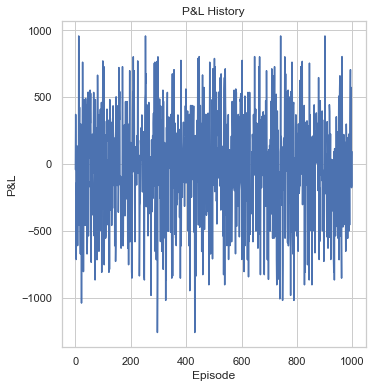

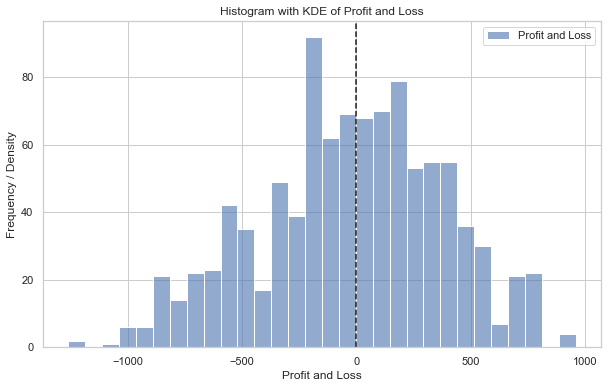

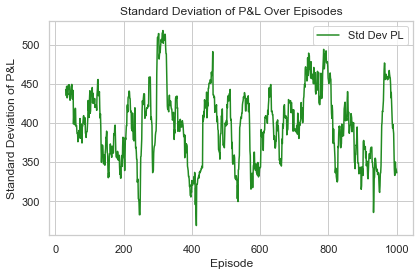

In [14]:
# Test the agent
pl_history_delta, std_pl_delta = test_agent(env_test, delta_agent, num_episodes=1000, num_steps=30)
episodes = np.array(list(range(1, len(pl_history_delta) + 1)))

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_delta)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_delta, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()

#Plot std
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(episodes, std_pl_delta, color='forestgreen', label='Std Dev PL')
ax.set_xlabel('Episode')
ax.set_ylabel('Standard Deviation of P&L')
ax.set_title('Standard Deviation of P&L Over Episodes')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


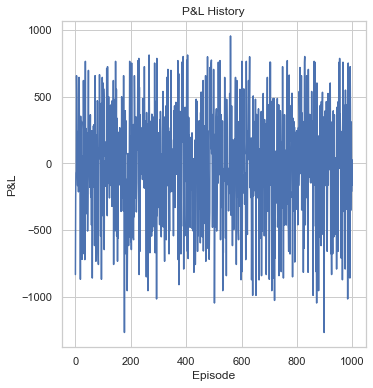

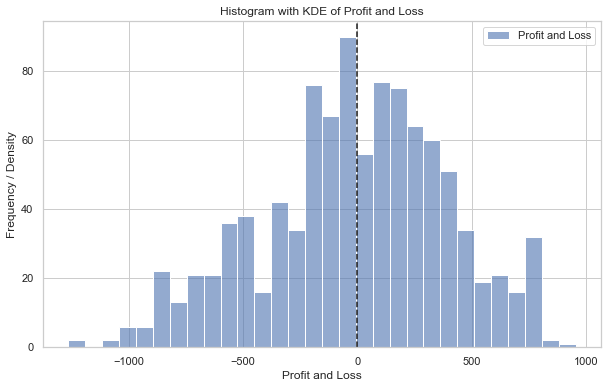

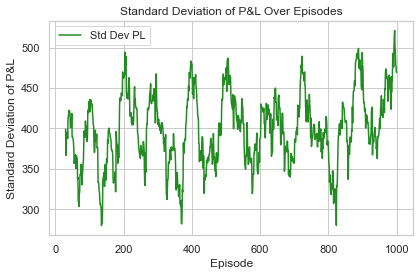

In [15]:
# Test the agent
pl_history_dqn, std_pl_dqn = test_agent(env_test, dqn_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_dqn)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_dqn, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

#Plot std
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(episodes, std_pl_dqn, color='forestgreen', label='Std Dev PL')
ax.set_xlabel('Episode')
ax.set_ylabel('Standard Deviation of P&L')
ax.set_title('Standard Deviation of P&L Over Episodes')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


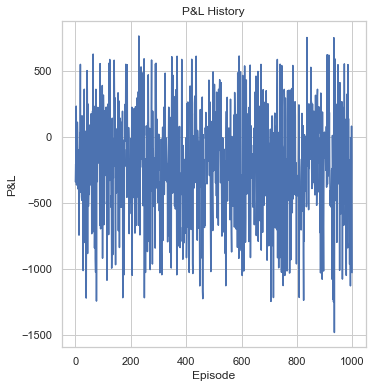

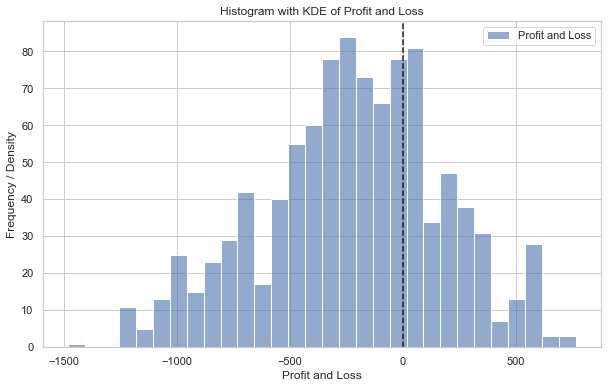

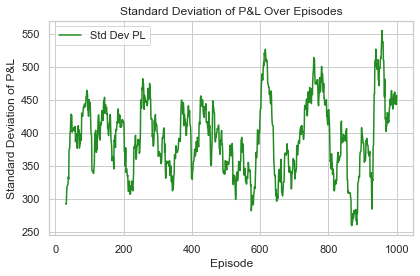

In [16]:
# Test the agent
pl_history_ddpg, std_pl_ddpg = test_agent(env_test, ddpg_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_ddpg)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

#Plot std
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(episodes, std_pl_ddpg, color='forestgreen', label='Std Dev PL')
ax.set_xlabel('Episode')
ax.set_ylabel('Standard Deviation of P&L')
ax.set_title('Standard Deviation of P&L Over Episodes')
ax.legend(loc='best')
plt.tight_layout()
plt.show()


plt.show()

## Combining

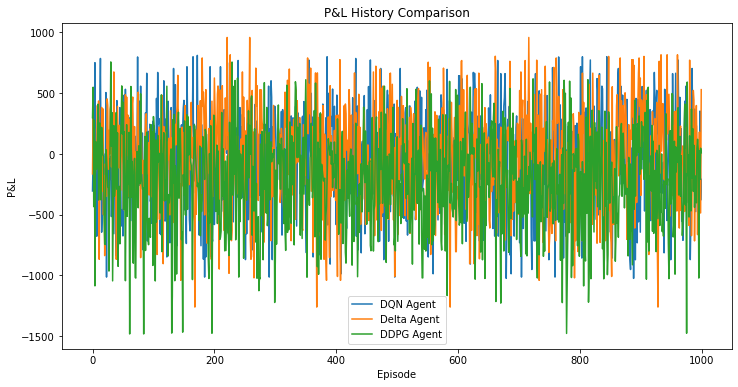

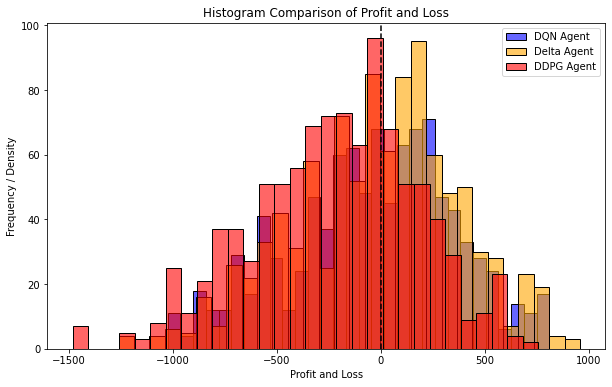

In [11]:
# Plot P&L history comparison
plt.figure(figsize=(12, 6))

# Line plot of P&L histories
plt.plot(pl_history_dqn, label="DQN Agent")
plt.plot(pl_history_delta, label="Delta Agent")
plt.plot(pl_history_ddpg, label="DDPG Agent")

plt.title("P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("P&L")
plt.legend()
plt.show()

# Histogram comparison
plt.figure(figsize=(10, 6))

sns.histplot(pl_history_dqn, kde=False, bins=30, label="DQN Agent", color="blue", alpha=0.6)
sns.histplot(pl_history_delta, kde=False, bins=30, label="Delta Agent", color="orange", alpha=0.6)
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="DDPG Agent", color="red", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram Comparison of Profit and Loss")
plt.legend()
plt.show()

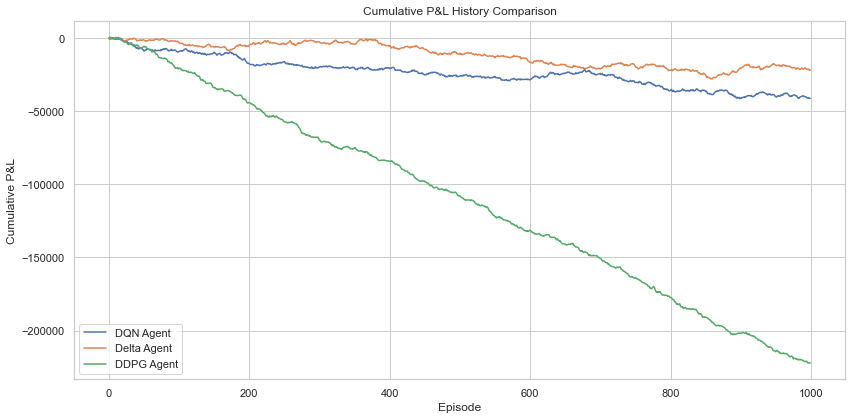

In [12]:
cum_pl_dqn = np.cumsum(pl_history_dqn)
cum_pl_delta = np.cumsum(pl_history_delta)
cum_pl_ddpg = np.cumsum(pl_history_ddpg)

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Plot Cumulative P&L comparison
plt.figure(figsize=(12, 6))

plt.plot(cum_pl_dqn, label="DQN Agent")
plt.plot(cum_pl_delta, label="Delta Agent")
plt.plot(cum_pl_ddpg, label="DDPG Agent")

plt.title("Cumulative P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.tight_layout()
plt.show()

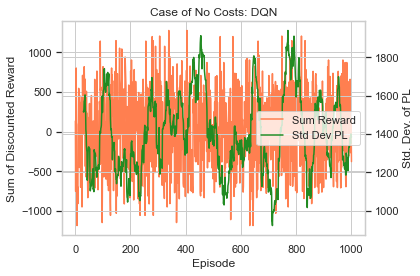

In [14]:
# ## DELTA
# episodes = np.array(list(range(1, len(pl_history_delta) + 1)))

# # Create a figure for dual-axis plotting
# fig = plt.figure(figsize=[6, 4])
# ax1 = fig.add_subplot(111)

# # Plot Sum of Discounted Reward
# ax1.plot(episodes, reward_history_delta, color='coral', label='Sum Reward')
# ax1.set_xlabel('Episode')
# ax1.set_ylabel("Sum of Discounted Reward")
# h1, l1 = ax1.get_legend_handles_labels()

# # Create a secondary axis for Std Dev PL
# ax2 = ax1.twinx()
# ax2.plot(episodes, std_pl_delta, color='forestgreen', label='Std Dev PL')
# ax2.set_ylabel("Std. Dev. of PL")
# h2, l2 = ax2.get_legend_handles_labels()

# # Combine legends for both axes and set the title
# ax2.legend(h1 + h2, l1 + l2, loc='center right')
# ax1.set_title('Case of No Costs: DQN')

# plt.tight_layout()
# plt.show()

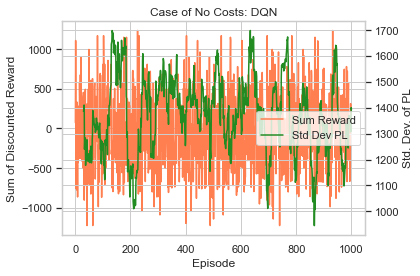

In [15]:
# ## DQN

# # Create a figure for dual-axis plotting
# fig = plt.figure(figsize=[6, 4])
# ax1 = fig.add_subplot(111)

# # Plot Sum of Discounted Reward
# ax1.plot(episodes, reward_history_dqn, color='coral', label='Sum Reward')
# ax1.set_xlabel('Episode')
# ax1.set_ylabel("Sum of Discounted Reward")
# h1, l1 = ax1.get_legend_handles_labels()

# # Create a secondary axis for Std Dev PL
# ax2 = ax1.twinx()
# ax2.plot(episodes, std_pl_dqn, color='forestgreen', label='Std Dev PL')
# ax2.set_ylabel("Std. Dev. of PL")
# h2, l2 = ax2.get_legend_handles_labels()

# # Combine legends for both axes and set the title
# ax2.legend(h1 + h2, l1 + l2, loc='center right')
# ax1.set_title('Case of No Costs: DQN')

# plt.tight_layout()
# plt.show()

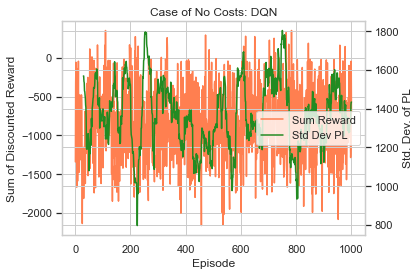

In [16]:
# ## DDPG

# # Create a figure for dual-axis plotting
# fig = plt.figure(figsize=[6, 4])
# ax1 = fig.add_subplot(111)

# # Plot Sum of Discounted Reward
# ax1.plot(episodes, reward_history_ddpg, color='coral', label='Sum Reward')
# ax1.set_xlabel('Episode')
# ax1.set_ylabel("Sum of Discounted Reward")
# h1, l1 = ax1.get_legend_handles_labels()

# # Create a secondary axis for Std Dev PL
# ax2 = ax1.twinx()
# ax2.plot(episodes, std_pl_ddpg, color='forestgreen', label='Std Dev PL')
# ax2.set_ylabel("Std. Dev. of PL")
# h2, l2 = ax2.get_legend_handles_labels()

# # Combine legends for both axes and set the title
# ax2.legend(h1 + h2, l1 + l2, loc='center right')
# ax1.set_title('Case of No Costs: DQN')

# plt.tight_layout()
# plt.show()